# Lab 2: Mine Crafting
**Oguz Tanatar**

**Peter Teuben, Brian Clarke**

**PHYS265**

**3/31/2025**

## Part 1: The Ideal Case

### Problem 1.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81 #m/s**2

#we know x1 = -g*t**2 / 2
#since we are heading into the earth, x1 = -4000 = -4e3
x1 = -4e3
#given these, it's quite simple to find t by isolating it in the equation

t1 = np.sqrt(-2*x1 / g)
print(f"Here is the time for the test mass to reach the bottom of the 4km shaft without drag: {t1} seconds")

Here is the time for the test mass to reach the bottom of the 4km shaft without drag: 28.55686245854129 seconds


### Problem 2.

In [84]:
#defining ODE
def odes2(t, y_vector):
    y, v = y_vector
    dydt = v
    dvdt = -g - (a * v**c)
    return dydt, dvdt

#alpha (a) and gamma (c) will be defined in problem 3 and onwards


In LaTeX, the above cell essentially outputs: 

$\frac{dy}{dt} = v$

$\frac{dv}{dt} = -g - \alpha(v)^\gamma $

Which arises naturally after recognizing that since $v = \frac{dy}{dt}$, $\frac{d^2 y}{dt^2} = \frac{dv}{dt}$

Also note that we used the natural latin translations of $\alpha$ and $\gamma$, $a$ and $c$

### Problem 3

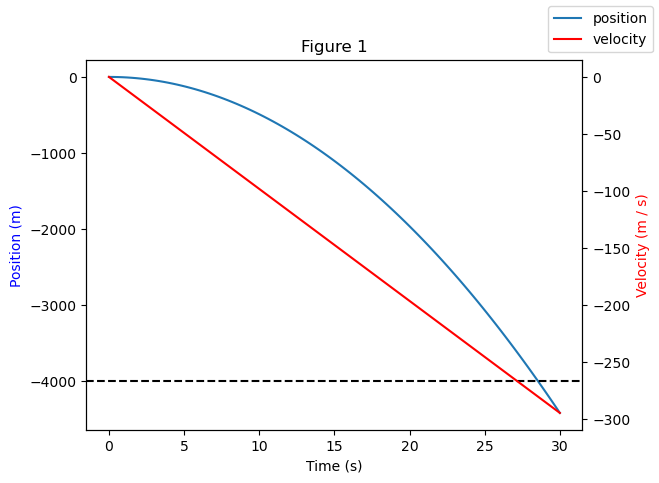

In [85]:
##### since we are taking alpha to be zero, for simplicity's sake, we will take c = 1
a = 0
c = 1

#solve differential equation from Problem 1
soln3 = solve_ivp(fun = odes2, t_span = (0, 30), y0 = (0, 0), t_eval = np.linspace(0, 30, 100), dense_output=True)

#specify quantities of interest
y2 = soln3.y[0]
v2 = soln3.y[1]
t2 = soln3.t

#create subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#plot position and velocity
ax1.plot(t2, y2, label = 'position')
ax2.plot(t2, v2, label = 'velocity', color = 'red')

#set labels, legends
ax1.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m / s)", color = 'red')
ax1.set_ylabel("Position (m)", color = 'blue')
fig.legend()
ax1.set_title("Figure 1")

#set an axis line to make the shaft bottom clear. 
ax1.axhline(y = -4000, color = 'black', ls = '--')


Figure 1: The position and velocity plotted with respect to time, in SI units. The dashed black line at Position = -4000 is the depth of the mine. 

### Problem 4

In [86]:
#define event function that returns zero at shaft bottom
def event4(t, y_vector):
    y, v = y_vector
    return y + 4000

#solve the differential equation with this event declared. 
soln4 = solve_ivp(fun = odes2, t_span = (0, 30), y0 = (0, 0), t_eval = np.linspace(0, 30, 100), dense_output=True, events = event4)
#pull the event from the soln object. 
t_event4 = soln4.t_events[0][0]

In [87]:
f"""The time found from analytically solving the dragless ODE that governs a freefalling body is {t1} seconds, while the time we found by
solving the same ODE numerically is {t_event4}. The differences between these two values is {t1-t_event4}, which is negligible on the scale that we are working at."""

'The time found from analytically solving the dragless ODE that governs a freefalling body is 28.55686245854129 seconds, while the time we found by\nsolving the same ODE numerically is 28.5568624585413. The differences between these two values is -1.0658141036401503e-14, which is negligible on the scale that we are working at.'

## Part 2: Including Drag and a Variable $g$

### Problem 1

Text(0.5, 1.0, 'Figure 2')

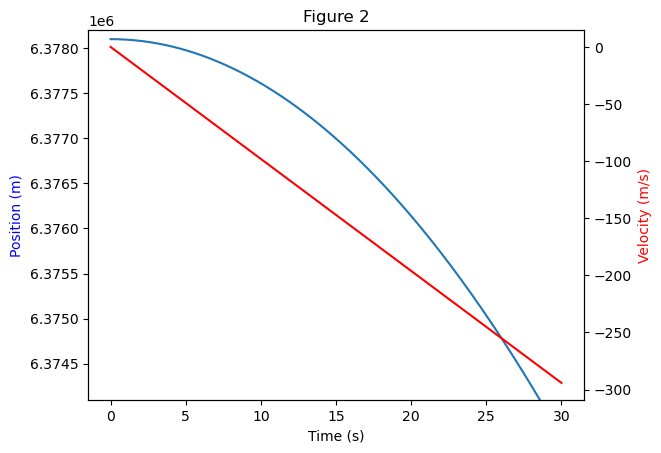

In [88]:
#adjust the labels on all the objects to partproblem format for convenience later on. 
#declare necessary constants
g_0 = 9.81
Earth_R = 6378.1e3
shaft_bottom = Earth_R - 4e3

#define a linearly decreasing gravity function
def g(y): 
    g = g_0 * y / Earth_R
    return g

#define ODE with variable gravity
def odes1(t, y_vector):
    y, v = y_vector
    dydt = v
    dvdt = -g(y) - (a * v**c)
    return dydt, dvdt

#declare event when mass hits shaft bottom
def event4(t, y_vector):
    y, v = y_vector
    return y - shaft_bottom

#solve the ODE with varying gravity and with the event in mind
soln3 = solve_ivp(fun = odes1, t_span = (0, 30), y0 = (Earth_R, 0), t_eval = np.linspace(0, 30, 1000), dense_output=True, events = event4)
#pull interesting objects
y1 = soln3.y[0]
v1 = soln3.y[1]
t1 = soln3.t
t_event1 = soln3.t_events[0][0]

#create plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t1, y1)
ax2.plot(t1, v1, color = 'red')
ax1.set_ylim(shaft_bottom, Earth_R + 100)
ax1.set_ylabel("Position (m)", color = 'blue')
ax2.set_ylabel("Velocity (m/s)", color = 'red')
ax1.set_xlabel("Time (s)")
ax1.set_title("Figure 2")

Figure 2: Position and velocity (Both in SI units) plotted against time with linearly decreasing gravity. 

### Problem 2

In [89]:
print(f"""The fall time with a constant gravity is {t_event4} seconds, while the fall time with gravity decreasing linearly is {t_event1} seconds. 
Although not by much, the latter is larger. This is due to the fact that as the mass gets closer to the center of the earth, the gravitation gets weaker,
meaning that the force of gravity (the thing pulling the mass down) is smaller. Therefore, it does not speed up as much. This, in turn results in a longer 
fall time""")

The fall time with a constant gravity is 28.5568624585413 seconds, while the fall time with gravity decreasing linearly is 28.558355111904834 seconds. 
Although not by much, the latter is larger. This is due to the fact that as the mass gets closer to the center of the earth, the gravitation gets weaker,
meaning that the force of gravity (the thing pulling the mass down) is smaller. Therefore, it does not speed up as much. This, in turn results in a longer 
fall time


### Problem 3

alpha was calculated to be  -0.003922769539518038


Text(0.5, 0, 'Time (s)')

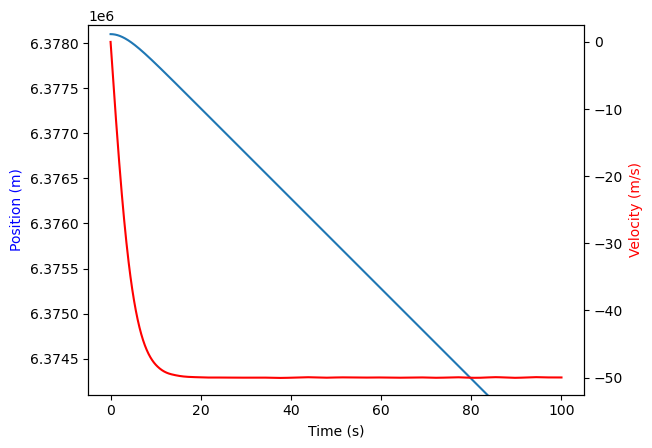

In [90]:
#finding a. 
#At terminal velocity (50 m/s), the drag term should be equal to the gravitational force. 
#Also note that at the bottom of the shaft, where gravity is weakest, the gravitational acceleration becomes 9.803, hardly different from 9.81 at the scale that we are working on. 
#I will take the average of these two values, to be representative. 
#take the average of the gravity at the bounds of the mine
g_3 = (g(Earth_R) + g(shaft_bottom))/2

c = 2

a = -g_3 / (50**c)  #NOTE: The convention was changed so that the drag term has a negative sign, but this is cancelled by the negative alpha term. 
print("alpha was calculated to be ", a)

#solve the ivp with drag in mind. The drag term updates automatically with alpha re-declared
soln23 = solve_ivp(fun = odes1, t_span = (0, 100), y0 = (Earth_R, 0), t_eval = np.linspace(0, 100, 1000), dense_output=True, events = event4)

#pull interesting objects
y23 = soln23.y[0]
v23 = soln23.y[1]
t23 = soln23.t
t_event23 = soln23.t_events[0][0]

#create plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t23, y23)
ax2.plot(t23, v23, color = 'red')
ax1.set_ylim(shaft_bottom, Earth_R + 100)
ax1.set_ylabel("Position (m)", color = 'blue')
ax2.set_ylabel("Velocity (m/s)", color = 'red')
ax1.set_xlabel("Time (s)")

Including drag increases the fall time significantly, as expected. Whereas the fall time without drag was 28.5568624585413 seconds, the fall time now is 83.5311434709017 seconds. Since the acceleration zeroes out after a certain point, the mass begins to move in a constant fashion, causing the linear motion we see after about 10 seconds of falling. 

## Part 3: The Coriolis Force

### Problem 1:

Let's do some theory first just to make sure we have our math right: 
Since we are now working in 3d, we need to replace the y-coordinate with a position vector, $\vec{r} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$. Next, we recognize that our velocity vector is $\vec{v} = \begin{pmatrix} \frac{dx}{dt} \\ \frac{dy}{dt} \\ \frac{dz}{dt} \end{pmatrix}$.  

Finally, we take the derivative of our velocity vector to arrive at our acceleration vector

$\vec{\frac{dv}{dt}} = \begin{pmatrix} \frac{dv_x}{dt} \\ \frac{dv_y}{dt} \\ \frac{dv_z}{dt} \end{pmatrix}$

We know that acceleration in the z-direction is zero, since the coriolis force in that direction is zero as well. Therefore, $\frac{dv_z}{dt}$ must be zero. From Equations (4) and (5), we know that 

$F_{c_x}  = +2m\Omega v_y$

$F_{c_y}  = -2m\Omega v_x$

Given this information, and Newton's second law, we can divide both sides by mass to arrive at the acceleration due to the Coriolis Force in the x & y directions:

$a_{c_x} = \frac{dv_x}{dt} = +2\Omega v_y$

$a_{c_y} = \frac{dv_y}{dt} = -2\Omega v_x$

By combining the Coriolis acceleration with our ODE for the y coordinate from earlier, we get: 

$\vec{\frac{dv}{dt}} = \begin{pmatrix} +2\Omega v_y \\ -g(y) - \alpha(v_y)^\gamma - 2\Omega v_x \\ 0 \end{pmatrix}$

For our final step, let's list our three  vectors: $\vec{r} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$, $\vec{v} = \begin{pmatrix} \frac{dx}{dt} \\ \frac{dy}{dt} \\ \frac{dz}{dt} \end{pmatrix}$, $\vec{\frac{dv}{dt}} = \begin{pmatrix} +2\Omega v_y \\ -g(y) - \alpha(v_y)^\gamma - 2\Omega v_x \\ 0 \end{pmatrix}$

We are now in a position to start writing Python code to define our ODE.

In [91]:
omega = 7.272e-5
#create ODE with Coriolis force (2 dimensional now)
def odes31(t, r_vector): 
    x, y, v_x, v_y = r_vector
    dxdt = v_x
    dydt = v_y
    dv_xdt = 2*omega*v_y
    dv_ydt = -g(y) - a*v_y**c - 2*omega*v_x
    return dxdt, dydt, dv_xdt, dv_ydt

### Problem 2

(-10.0, 1.0)

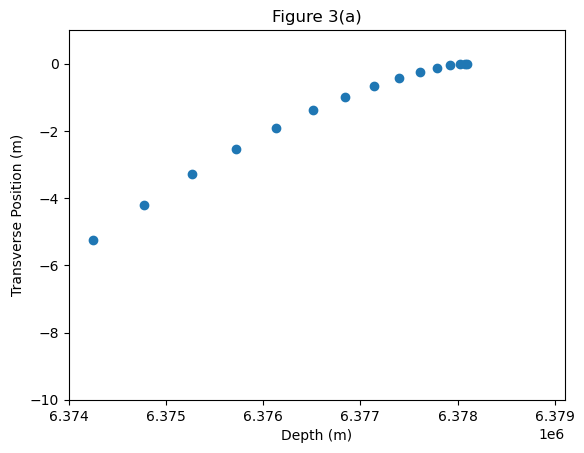

In [111]:
#re-declare alpha to be zero
a = 0

#define event for when test mass hits wall
def wall_hit(t, r_vector): 
    x, y, v_x, v_y = r_vector
    return x + 5 

#solve differential equation and pull necessary objects
soln32 = solve_ivp(fun = odes31, t_span = (0, 100), y0 = (0, Earth_R, 0, 0), t_eval = np.linspace(0, 100, 1000), dense_output=True, events = wall_hit)
t32 = soln32.t
x32 = soln32.y[0]
y32 = soln32.y[1]
dxdt32=soln32.y[2]
dydt32=soln32.y[3]

#create plots
fig, ax = plt.subplots()
ax.scatter(y32[::20], x32[::20])

ax.set_xlabel("Depth (m)")
ax.set_ylabel("Transverse Position (m)")
ax.set_title("Figure 3(a)")

ax.set_xlim(shaft_bottom - 100, Earth_R + 1000)
ax.set_ylim(-10, 1)

Figure 3(a): The transverse position of a test mass against its depth in the mine. The mass is dropped from the center of the mine at its opening, from rest. This model includes the Coriolis force and linearly decreasing gravity, without drag.  

### Problem 3

Although this problem can be solved numerically using the events detection capabilities of solve_ivp, it is computationally cheaper to just solve graphically. The graph is below. 

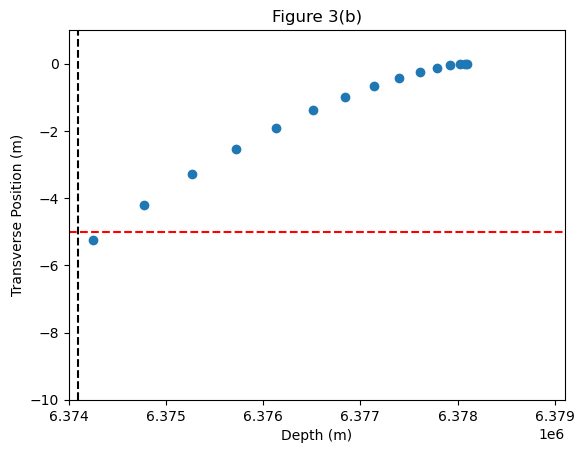

In [93]:
#copy the plot from the last problem
fig, ax = plt.subplots()
ax.scatter(y32[::20], x32[::20])

#relabel plots

ax.set_xlabel("Depth (m)")
ax.set_ylabel("Transverse Position (m)")
ax.set_title("Figure 3(b)")

ax.set_xlim(shaft_bottom - 100, Earth_R + 1000)
ax.set_ylim(-10, 1)

#add a vertical line at the shaft bottom: 

ax.axvline(x = shaft_bottom, color = 'black', ls = '--')
ax.axhline(y=-5, color = 'red', ls ='--')

Figure 3(b): The same as Fig. 3(a), with dashed lines at the mine's boundaries. The horizontal red dashed line represents the wall of the mine, while the vertical black line represents the bottom of the mineshaft.  

#### Answer to 3:
As we can tell from Fig. 3(b), the transverse position of the mass crosses the wall before the depth crosses the line representing the bottom of the shaft. Therefore, the mass hits the wall before it reaches the bottom. 

### Problem 4: 

With drag, the test mass hits the wall at a depth of 1848.122204085812 meters, in 40.492317904117485 seconds
Without drag, the test mass hits the wall at a depth of 3736.5219357339665 meters, in 27.601695604484753 seconds


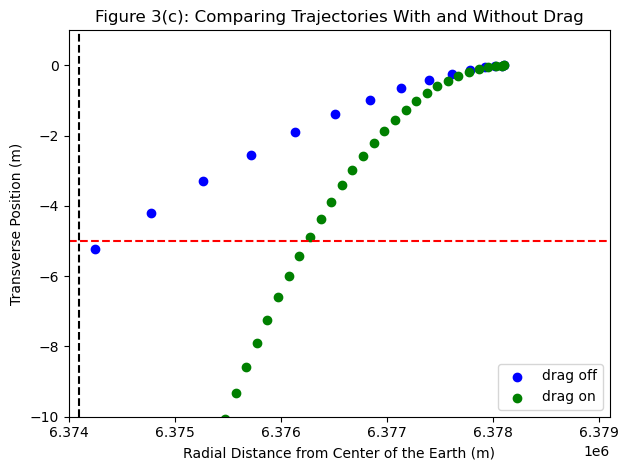

In [110]:
#redefine alpha to include drag
a = -g_3 / (50**c)

#solve the IVP with Coriolis force and drag
soln34 = solve_ivp(fun = odes31, t_span = (0, 100), y0 = (0, Earth_R, 0, 0), t_eval = np.linspace(0, 100, 1000), dense_output=True, events = wall_hit)
t34 = soln34.t
x34 = soln34.y[0]
y34 = soln34.y[1]
dxdt34 = soln34.y[2]
dydt34 = soln34.y[3]

#create plots
fig, ax = plt.subplots()
ax.axvline(x = shaft_bottom, color = 'black', ls = '--')
ax.axhline(y=-5, color = 'red', ls ='--')
ax.scatter(y32[::20], x32[::20], color = 'blue', label = 'drag off')
ax.scatter(y34[::20], x34[::20], color = 'green', label = 'drag on')
ax.set_xlim(shaft_bottom - 100, Earth_R + 1000)
ax.set_ylim(-10, 1)
ax.set_xlabel("Radial Distance from Center of the Earth (m)")
ax.set_ylabel("Transverse Position (m)")
ax.legend()
ax.set_title("Figure 3(c): Comparing Trajectories With and Without Drag") #Figure 1 in the report
plt.tight_layout()

#create print statements to make interesting quantities known
print(f"With drag, the test mass hits the wall at a depth of {Earth_R - soln34.y_events[0][0][1]} meters, in {soln34.t_events[0][0]} seconds")
print(f'Without drag, the test mass hits the wall at a depth of {Earth_R - soln32.y_events[0][0][1]} meters, in {soln32.t_events[0][0]} seconds')

Figure 3(c): Fig. 3(b), appended with the trajectory of the test mass when accounting for variable gravity and drag. 

As apparent from the graph, including a drag force in the model causes the test mass to hit the mine wall significantly sooner than without drag. 

## Part 4
### Problem 1

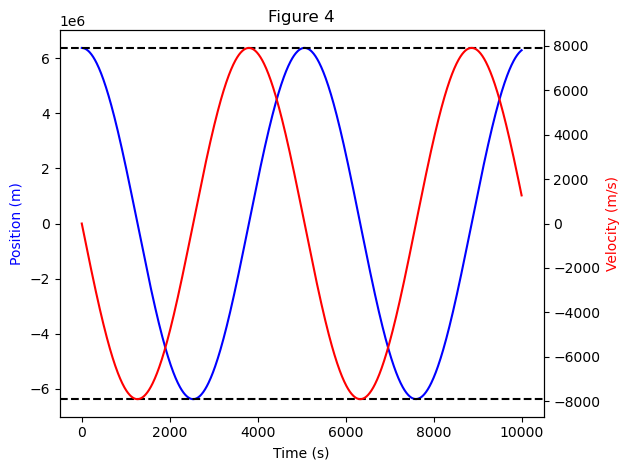

In [95]:
#define new ODE for 
def odes41(t, y_vector):
    y, v = y_vector
    dydt = v
    dvdt = -g(y)
    return dydt, dvdt

#solve IVP
soln41 = solve_ivp(fun = odes41, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000, 1000), dense_output = True)
#pull objects of interest
y41 = soln41.y[0]
v41 = soln41.y[1]
t41 = soln41.t
#create plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t41, y41, color = 'blue')
ax2.plot(t41, v41, color = 'red')
ax1.set_ylabel("Position (m)", color = 'blue')
ax1.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)", color = 'red')
ax1.axhline(y=Earth_R, ls = '--', color = 'black')
ax1.axhline(y=-Earth_R, ls = '--', color = 'black')
ax1.set_title("Figure 4")
plt.tight_layout()

Figure 4: The position and velocity of the test mass without drag in a mine going through the earth. The mass oscillates back and forth without decay. Essentially, a very big spring-mass system. Just like the force of a spring, gravity is conservative, and constantly accelerates the mass towards earth's core.

### Problem 2

In [96]:
#define event to see when the mass reaches the edges of the earth. 
def events42a(t, y_vector): 
    y, v = y_vector
    return v

#define event for when the mass reaches the center of the earth
def events42b(t, y_vector):
    y, v = y_vector
    return y

#solve IVP with events declared
soln42 = solve_ivp(fun = odes41, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000, 10000), dense_output = True, events = (events42a, events42b))

#define important quantities
t_through = soln42.t_events[0][1]
t_center = soln42.t_events[1][0]
v_center = soln42.y_events[1][0][1]


In [97]:
f"""The object takes {t_through} seconds to reach the other side of the earth. It crosses the center of the earth
in {t_center} seconds with a speed of {abs(v_center)} m/s"""

'The object takes 2532.6120147256643 seconds to reach the other side of the earth. It crosses the center of the earth\nin 1266.4734695588031 seconds with a speed of 7910.759872777071 m/s'

### Problem 3

Let's do some math first. We are given:

$\frac{v^2}{R} = \frac{GM}{R^2}$

Solving for v, we get:

$v^2 = \frac{GM}{R}$

$v = \sqrt{\frac{GM}{R}} = R\omega$

$\omega = \frac{1}{R}\sqrt{\frac{GM}{R}}$

Where R is the radius of orbit, and $\omega$ is the angular velocity. By recognizing that the angular velocity can be given in terms of the period $T$ by $\omega = \frac{2\pi}{T}$, and substituting in for $\omega$, we get: 

$\frac{2\pi}{T} = \frac{1}{R}\sqrt{\frac{GM}{R}}$

$T = 2\pi  R \sqrt{\frac{R}{GM}}$

The time to get to the "crossing position" is half a period, so just $\tau = \frac{T}{2}$, or: 

$\tau = \pi  R \sqrt{\frac{R}{GM}}$

In [114]:
#Cakculate T: 
G = 6.6743E-11
T = 2*np.pi*Earth_R*np.sqrt(Earth_R / (G * Earth_M))
print("Period is:", T)
tau = T  / 2
print("the time for the mass to go halfway around the earth is", tau, "seconds")
print(f"The crossing (time {t_through} seconds) is less than the time it takes for a mass to arrive at the same location by going around the earth, which is {tau} seconds, although by an almost negligible amount.")

Period is: 5069.371199675785
the time for the mass to go halfway around the earth is 2534.6855998378924 seconds
The crossing (time 2532.6120147256643 seconds) is less than the time it takes for a mass to arrive at the same location by going around the earth, which is 2534.6855998378924 seconds, although by an almost negligible amount.


## Part 5

### Problem 0 (solving for normalization constants)

In [99]:
#generate density functions for each n
from scipy.integrate import quad
Earth_M = 5.972E24
rho0 = lambda r: (1- r**2 / Earth_R**2)**0
rho1 = lambda r: (1- r**2 / Earth_R**2)**1
rho2 = lambda r: (1- r**2 / Earth_R**2)**2
rho9 = lambda r: (1- r**2 / Earth_R**2)**9

#normalize each density function such that density integrates to Earth's Mass
norm0 = Earth_M / (4*np.pi*quad(lambda r: rho0(r)*r**2, 0, Earth_R)[0])
norm1 = Earth_M / (4*np.pi*quad(lambda r: rho1(r)*r**2, 0, Earth_R)[0])
norm2 = Earth_M / (4*np.pi*quad(lambda r: rho2(r)*r**2, 0, Earth_R)[0])
norm9 = Earth_M / (4*np.pi*quad(lambda r: rho9(r)*r**2, 0, Earth_R)[0])
print("normalization for n = 0:", norm0, "kg/m^3")
print("normalization for n = 1:", norm1, "kg/m^3")
print("normalization for n = 2:", norm2, "kg/m^3")
print("normalization for n = 9:", norm9, "kg/m^3")
      

normalization for n = 0: 5494.8674095512 kg/m^3
normalization for n = 1: 13737.168523877996 kg/m^3
normalization for n = 2: 24040.044916786497 kg/m^3
normalization for n = 9: 135545.12141863423 kg/m^3


### Problem 1

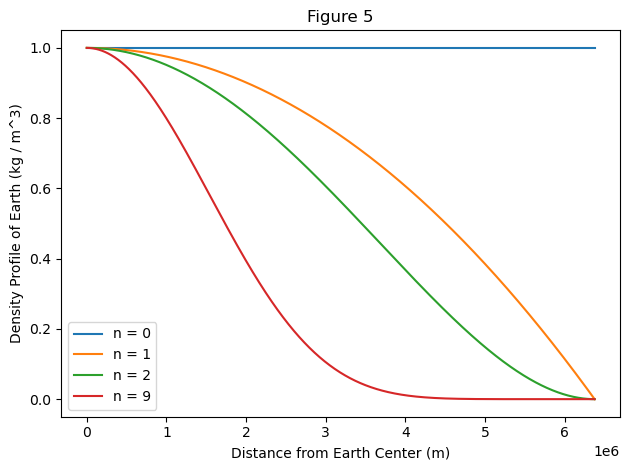

In [100]:
#define generic density functions
rho = lambda r, n: (1- r**2 / Earth_R**2)**n

#generate plotting limits
r_plot = np.linspace(0, Earth_R, 1000) 

#create plots
fig, ax = plt.subplots()
ax.plot(r_plot, rho(r_plot, 0), label = 'n = 0')
ax.plot(r_plot, rho(r_plot, 1), label = 'n = 1')
ax.plot(r_plot, rho(r_plot, 2), label = 'n = 2')
ax.plot(r_plot, rho(r_plot, 9), label = 'n = 9')
ax.set_xlabel('Distance from Earth Center (m)')
ax.set_ylabel('Density Profile of Earth (kg / m^3)')
ax.set_title("Figure 5")
ax.legend()
plt.tight_layout()

Figure 5: The Density profile of the Earth with respect to radial distance from the Earth's center assuming a spherically symmetric mass distribution. All indices normalized with unity. The plotted indices and corresponding plot colors are listed in hte legend of Fig. 5. 

### Problem 2

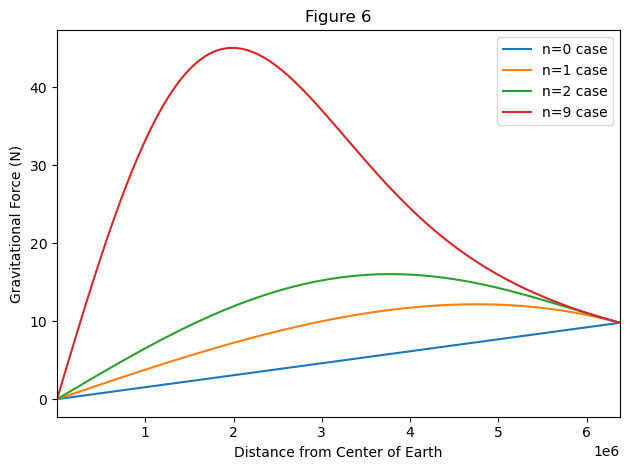

In [101]:
#define force functions for each n, of the form F52_n
def F52_0(y):
    M = norm0 * (4*np.pi*quad(lambda r: rho0(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

def F52_1(y):
    M = norm1 * (4*np.pi*quad(lambda r: rho1(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

def F52_2(y):
    M = norm2 * (4*np.pi*quad(lambda r: rho2(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

def F52_9(y):
    M = norm9 * (4*np.pi*quad(lambda r: rho9(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

#generate values to evaluate IVP at
y_plot52 = np.linspace(0, Earth_R, 1000)

#create empty lists for forces
F52_0_plot = []
F52_1_plot = []
F52_2_plot = []
F52_9_plot = []

#iterate through the radial distance values, evaluate the force, add the values to the force lists
for i in range(len(y_plot52)):
    if y_plot52[i] == 0:
        F52_0_plot.append(0)
        F52_1_plot.append(0)
        F52_2_plot.append(0)
        F52_9_plot.append(0)
    else:
        F52_0_plot.append(F52_0(y_plot52[i]))
        F52_1_plot.append(F52_1(y_plot52[i]))
        F52_2_plot.append(F52_2(y_plot52[i]))
        F52_9_plot.append(F52_9(y_plot52[i]))


#create plots
fig, ax = plt.subplots()
ax.plot(y_plot52, F52_0_plot, label ='n=0 case')
ax.plot(y_plot52, F52_1_plot, label ='n=1 case')
ax.plot(y_plot52, F52_2_plot, label ='n=2 case')
ax.plot(y_plot52, F52_9_plot, label ='n=9 case')
ax.set_xlim(1, Earth_R)
ax.set_xlabel('Distance from Center of Earth')
ax.set_ylabel('Gravitational Force (N)')
ax.set_title("Figure 6")
ax.legend()
plt.tight_layout()

Figure 6: The gravitational force of the earth plotted with respect to radial distance from the earth's center, assuming spherical symmetry. The normalizations for each plot are applied such that the density for each index integrate to the Earth's mass. The indices and corresponding plots are listed in the legend. 

### Problem 3

Just to touch base, we are making a plot without drag, and instead of using $g(y)$ as we did for Fig. 2, we use $F_n$ for the cases of $n = 0, 1, 2, 9$. The reason we use $F_n$ without dividing by mass is because the mass is already 1 kilogram, so we would only be dividing by one. Writing this into the code only makes the writing more complicated without offering anything qualitatively or quantitatively new. 

That said, our system of ODEs dependent on $y_n$ and $v_n$ for a given $n$ reduces to:

$\frac{dy_n}{dt} = v_n$

$\frac{dv_n}{dt} = -F_n$


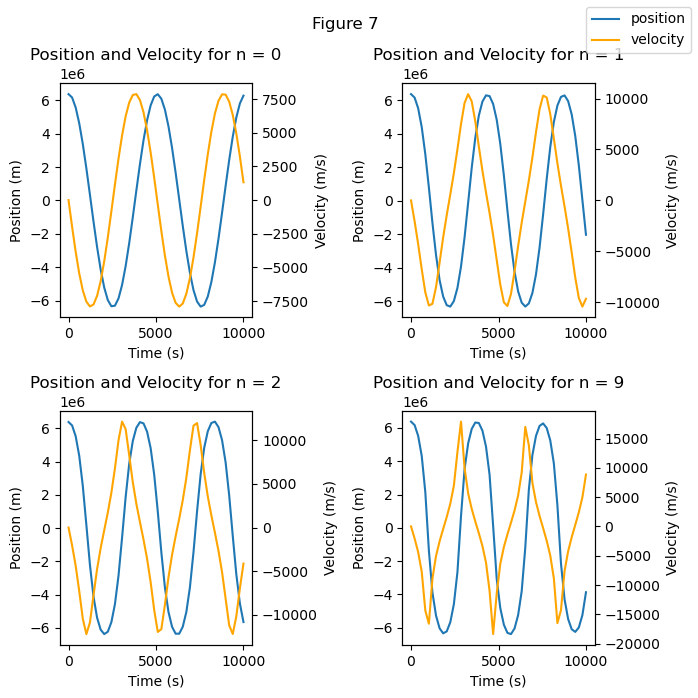

In [102]:
#Generate ODEs governing the mass's motion
def odes53_0(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F52_0(y)
    return dydt, dvdt

def odes53_1(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F52_1(y)
    return dydt, dvdt

def odes53_2(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F52_2(y)
    return dydt, dvdt

def odes53_9(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F52_9(y)
    return dydt, dvdt

#solve IVPs
soln53_0 = solve_ivp(fun = odes53_0, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000))
soln53_1 = solve_ivp(fun = odes53_1, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000))
soln53_2 = solve_ivp(fun = odes53_2, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000))
soln53_9 = solve_ivp(fun = odes53_9, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000))

#pull interesting quantities
t53 = soln53_0.t #use the same t array for all gravitational indices, as the t_eval points are all the same. 
y53_0 = soln53_0.y[0]
v53_0 = soln53_0.y[1]

y53_1 = soln53_1.y[0]
v53_1 = soln53_1.y[1]

y53_2 = soln53_2.y[0]
v53_2 = soln53_2.y[1]

y53_9 = soln53_9.y[0]
v53_9 = soln53_9.y[1]

#create plots
fig, ((ax1a, ax1b), (ax1c, ax1d)) = plt.subplots(2, 2, figsize = (7, 7)) 
#set up twin axes
ax2a = ax1a.twinx()
ax2b = ax1b.twinx()
ax2c = ax1c.twinx()
ax2d = ax1d.twinx()
#Plot n = 0
ax1a.plot(t53, y53_0, label = 'position')
ax2a.plot(t53, v53_0, label = 'velocity', color = 'orange')
ax1a.set_title('Position and Velocity for n = 0')
ax1a.set_xlabel('Time (s)')
ax1a.set_ylabel('Position (m)')
ax2a.set_ylabel('Velocity (m/s)')

#Add legend here because the plots share colors and names
fig.legend()

#Plot n = 1
ax1b.plot(t53, y53_1, label = 'position')
ax2b.plot(t53, v53_1, label = 'velocity', color = 'orange')
ax1b.set_title('Position and Velocity for n = 1')
ax1b.set_xlabel('Time (s)')
ax1b.set_ylabel('Position (m)')
ax2b.set_ylabel('Velocity (m/s)')
#Plot n = 2
ax1c.plot(t53, y53_2, label = 'position')
ax2c.plot(t53, v53_2, label = 'velocity', color = 'orange')
ax1c.set_title('Position and Velocity for n = 2')
ax1c.set_xlabel('Time (s)')
ax1c.set_ylabel('Position (m)')
ax2c.set_ylabel('Velocity (m/s)')
#Plot n = 9
ax1d.plot(t53, y53_9, label = 'position')
ax2d.plot(t53, v53_9, label = 'velocity', color = 'orange')
ax1d.set_title('Position and Velocity for n = 9')
ax1d.set_xlabel('Time (s)')
ax1d.set_ylabel('Position (m)')
ax2d.set_ylabel('Velocity (m/s)')
fig.suptitle("Figure 7") #Figure 2 in the report

plt.tight_layout()

Figure 7: The position of the test mass in the pole-pole mine shaft derived from solving for position from the gravitational force for the mass distribution corresponding to each index. The blue lines correspond to position, and the yellow lines correspond to velocity. 

### Problem 4

In [103]:
#define event to see when mass crosses earth's center
def event54(t, y_vector):
    y, v = y_vector
    return y
#solve IVPs with event declared
soln54_0 = solve_ivp(fun = odes53_0, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000), events = event54)
soln54_1 = solve_ivp(fun = odes53_1, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000), events = event54)
soln54_2 = solve_ivp(fun = odes53_2, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000), events = event54)
soln54_9 = solve_ivp(fun = odes53_9, t_span = (0, 10000), y0 = (Earth_R, 0), t_eval = np.linspace(0, 10000), events = event54)

#pull interesting quantities
t_center_0 = soln54_0.t_events[0][0]
t_center_1 = soln54_1.t_events[0][0]
t_center_2 = soln54_2.t_events[0][0]
t_center_9 = soln54_9.t_events[0][0]

v_center_0 = abs(soln54_0.y_events[0][0][1])
v_center_1 = abs(soln54_1.y_events[0][0][1])
v_center_2 = abs(soln54_2.y_events[0][0][1])
v_center_9 = abs(soln54_9.y_events[0][0][1])

f"""For the n = 0 case, the test mass reaches the center in {t_center_0} seconds, with a speed of {v_center_0} meters per second. 
For the n = 1 case, the test mass reaches the center in {t_center_1} seconds, with a speed of {v_center_1} meters per second.
For the n = 2 case, the test mass reaches the center in {t_center_2} seconds, with a speed of {v_center_2} meters per second.
For the n = 9 case, the test mass reaches the center in {t_center_9} seconds, with a speed of {v_center_9} meters per second."""

'For the n = 0 case, the test mass reaches the center in 1267.2409534601397 seconds, with a speed of 7905.9712480728695 meters per second. \nFor the n = 1 case, the test mass reaches the center in 1096.891482002539 seconds, with a speed of 10435.238778034964 meters per second.\nFor the n = 2 case, the test mass reaches the center in 1035.1387754254647 seconds, with a speed of 12200.745609087797 meters per second.\nFor the n = 9 case, the test mass reaches the center in 943.8748065601542 seconds, with a speed of 18391.99683151934 meters per second.'

## Part 6

### Problem 1

In [104]:
#necessary quantities for the moon
Moon_M = 7.35E22
Moon_R = 1738.1E3

#declare density functions for the moon for each n
moon_rho0 = lambda r: (1- r**2 / Moon_R**2)**0
moon_rho1 = lambda r: (1- r**2 / Moon_R**2)**1
moon_rho2 = lambda r: (1- r**2 / Moon_R**2)**2
moon_rho9 = lambda r: (1- r**2 / Moon_R**2)**9

#declare normalizations for the moon so the densities integrate to moon's mass. 
moon_norm0 = Moon_M / (4*np.pi*quad(lambda r: moon_rho0(r)*r**2, 0, Moon_R)[0])  
moon_norm1 = Moon_M / (4*np.pi*quad(lambda r: moon_rho1(r)*r**2, 0, Moon_R)[0])
moon_norm2 = Moon_M / (4*np.pi*quad(lambda r: moon_rho2(r)*r**2, 0, Moon_R)[0])
moon_norm9 = Moon_M / (4*np.pi*quad(lambda r: moon_rho9(r)*r**2, 0, Moon_R)[0])

#create force functions on the moon
def F61_0(y):
    M = moon_norm0 * (4*np.pi*quad(lambda r: moon_rho0(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

def F61_1(y):
    M = moon_norm1 * (4*np.pi*quad(lambda r: moon_rho1(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

def F61_2(y):
    M = moon_norm2 * (4*np.pi*quad(lambda r: moon_rho2(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

def F61_9(y):
    M = moon_norm9 * (4*np.pi*quad(lambda r: moon_rho9(r)*r**2, 0, y)[0])
    F = G * M / (y**2)
    return F

#create ODEs for the lunar mineshaft
def odes61_0(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F61_0(y)
    return dydt, dvdt

def odes61_1(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F61_1(y)
    return dydt, dvdt

def odes61_2(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F61_2(y)
    return dydt, dvdt

def odes61_9(t, y_vector): 
    y, v = y_vector
    dydt = v
    dvdt = -F61_9(y)
    return dydt, dvdt

#define event to see when the mass crosses the center of the moon
def event61(t, y_vector):
    y, v = y_vector
    return y

#solve IVPs
soln61_0 = solve_ivp(fun = odes61_0, t_span = (0, 10000), y0 = (Moon_R, 0), t_eval = np.linspace(0, 10000), events = event54)
soln61_1 = solve_ivp(fun = odes61_1, t_span = (0, 10000), y0 = (Moon_R, 0), t_eval = np.linspace(0, 10000), events = event54)
soln61_2 = solve_ivp(fun = odes61_2, t_span = (0, 10000), y0 = (Moon_R, 0), t_eval = np.linspace(0, 10000), events = event54)
soln61_9 = solve_ivp(fun = odes61_9, t_span = (0, 10000), y0 = (Moon_R, 0), t_eval = np.linspace(0, 10000), events = event54)

#pull arrays and numbers of interest
t_moon_center_0 = soln61_0.t_events[0][0]
t_moon_center_1 = soln61_1.t_events[0][0]
t_moon_center_2 = soln61_2.t_events[0][0]
t_moon_center_9 = soln61_9.t_events[0][0]


v_moon_center_0 = abs(soln61_0.y_events[0][0][1])
v_moon_center_1 = abs(soln61_1.y_events[0][0][1])
v_moon_center_2 = abs(soln61_2.y_events[0][0][1])
v_moon_center_9 = abs(soln61_9.y_events[0][0][1])

f"""Using the events detection capabilities of solve_ivp, we find that for each density index n = 0, 1, 2, 9, we find that the times to cross the center are {t_moon_center_0} 
seconds, {t_moon_center_1} seconds, {t_moon_center_2} seconds, {t_moon_center_9} seconds, respectively."""

'Using the events detection capabilities of solve_ivp, we find that for each density index n = 0, 1, 2, 9, we find that the times to cross the center are 1624.9059919737133 \nseconds, 1406.3556758235407 seconds, 1327.0959971364869 seconds, 1210.2641048046742 seconds, respectively.'

### Problem 2

In [105]:
f"""The mass density of the moon, assuming uniform mass distribution, is {moon_norm0} kg / m^3, while the mass density of the Earth with constant mass distribution is {norm0}
kg / m^3. The density of the moon is much less than that of Earth."""

'The mass density of the moon, assuming uniform mass distribution, is 3341.7538038703174 kg / m^3, while the mass density of the Earth with constant mass distribution is 5494.8674095512\nkg / m^3. The density of the moon is much less than that of Earth.'

### Problem 3

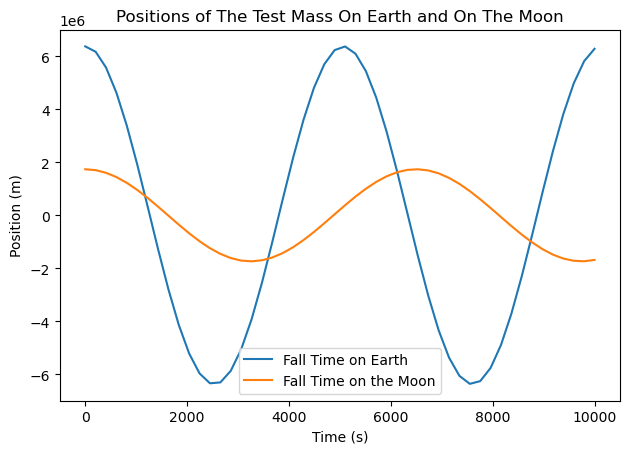

In [106]:
t61_0 = soln61_0.t
y61_0 = soln61_0.y[0]

#plot the oscillations on the moon and on the earth to better visualize it. 
fig, ax = plt.subplots()
ax.plot(t53, y53_0, label = 'Fall Time on Earth')
ax.plot(t61_0, y61_0, label = 'Fall Time on the Moon')
ax.set_ylabel('Position (m)')
ax.set_xlabel('Time (s)')
ax.set_title('Positions of The Test Mass On Earth and On The Moon')
ax.legend()
plt.tight_layout()

If we look at the figure above, we see that both masses oscillate as cosines. The two differences between the oscillations on Earth and the oscillations on the Moon are 
in the amplitudes of the oscillations, and in their frequencies. The amplitudes can be explained quite easily by the different radii of the two bodies (The moon is smaller than the earth, so dropping a particle from the moon's surface will give it a smaller amplitude than dropping it from the Earth's surface).

The frequencies on the other hand, ought to come down to the different densities of the two bodies. If we call the frequency on earth $\omega_E$, and the frequency on the moon $\omega_m$, we can say that the oscillations are of the form $y_m(t) = A_m \cos(\omega_m t)$ on the moon, and $y_E(t) = A_E \cos(\omega_E t)$. We know that these will equal zero when 

$\omega t_{fall} = \frac{\pi}{2}$

Then, we can read off that $t_{fall} = \frac{\pi}{2\omega}$

Now, it is in our interest to find a relationship between $\omega$ and density, $\rho$

Returning to our differential equation, we see that:

$\frac{d^2y}{dt} = -F_g = \frac{-G 16\pi^2 \rho y}{3}$

Which is derived from using a form of Gauss's Law designed for gravity. This is quite reminiscent of the differential equation for an ideal harmonic oscillator, where:

$\frac{-G 16\pi^2 \rho}{3} = \omega ^2$

$\omega = \sqrt{\frac{-G 16\pi^2 \rho}{3}}$

Then, qualitativey, we find that: 

$\omega \propto \sqrt{\rho}$

Plugging this approximate equation for $\omega$ into our equation for $t_{fall}$, we find that 

$t_{fall} \propto \frac{\pi}{2 \sqrt{\rho}}$ 

Therefore, we see an inverse square root relationship between fall time and density, for a uniformly mass-distributed body. 